In [12]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

from file import save_file

In [13]:
# Define the ticker symbol
tickerSymbol = 'QQQ'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
history = tickerData.history(interval='1wk', start='2022-1-1', end=date.today())

In [14]:
CL = history['Low'].shift(-1) / history['Close'] - 1
print(f'{tickerSymbol} Close to next Low median {CL.median():.2%}')

QQQ Close to next Low median -1.89%


In [15]:
max_weeks = 50

In [16]:
gap = (5/430)*100
# option_prices = {
#     # 1: [435/2.87, 435/4.33],
#     2: [435/4.49, 435/6.62],
#     3: [435/6.03, 435/8.59],
#     4: [415/10.37, 435/7.64, 435/9.57],
#     5: [415/11.86, 435/8.59, 435/10.84],
#     6: [415/12.92, 435/9.75, 435/12.16],
#     7: [435/13.07],
#     8: [435/11.85, 435/13.88],
#     9: [415/16.35, 435/12.62],
#     11: [435/16.45],
#     12: [435/15.15],
#     13: [415/19.55],
#     15: [435/20.16],
#     16: [435/18.73],
#     17: [415/23.06],
#     20: [435/24.33],
#     21: [435/22.86],
#     22: [415/27.19],
#     24: [435/27.06],
#     25: [435/25.63],
#     26: [415/29.83],
#     29: [435/29.18],
#     30: [415/33.21],
#     34: [435/32.81],
#     35: [415/36.78],
#     36: [435/33.23],
#     39: [415/36.14]
# }
# print('option leverages:')
# for w in option_prices:
#     print(f'\t{w:2}w', *[f'{x:4.1f}' for x in option_prices[w]])

# option_leverage = {w:mean(option_prices[w]) for w in option_prices}
option_leverage={
 1: 92.0844327176781,
 2: 60.71839464882943,
 3: 47.354138398914515,
 4: 40.0,
 5: 35.7926221335992,
 6: 31.53118919836513,
 7: 28.45482587416874,
 8: 25.657298277425205,
 9: 24.981949458483754,
 10: 23.388429752066116,
 11: 22.802813653136532,
 12: 20.210280373831775,
 13: 20.966962090351938,
 14: 19.204628599977436,
 15: 18.361581920903955,
 16: 18.489638521389,
 17: 16.84843687457022,
 18: 16.657967988865693,
 19: 16.006021073758152,
 20: 15.980370425102212,
 21: 15.018484288354898,
 22: 14.927012321632724,
 23: 14.291474654377879,
 24: 13.770913770913772,
 25: 13.528843202327359,
 26: 13.204442616207324}
print('mean option leverage, break even:')
for w in option_leverage:
    print(f'\t{w:2}w {option_leverage[w]:4.1f} {gap + 100/option_leverage[w]:4.1f}%')
print(f'option gap: {gap:.2f}%')

mean option leverage, break even:
	 1w 92.1  2.2%
	 2w 60.7  2.8%
	 3w 47.4  3.3%
	 4w 40.0  3.7%
	 5w 35.8  4.0%
	 6w 31.5  4.3%
	 7w 28.5  4.7%
	 8w 25.7  5.1%
	 9w 25.0  5.2%
	10w 23.4  5.4%
	11w 22.8  5.5%
	12w 20.2  6.1%
	13w 21.0  5.9%
	14w 19.2  6.4%
	15w 18.4  6.6%
	16w 18.5  6.6%
	17w 16.8  7.1%
	18w 16.7  7.2%
	19w 16.0  7.4%
	20w 16.0  7.4%
	21w 15.0  7.8%
	22w 14.9  7.9%
	23w 14.3  8.2%
	24w 13.8  8.4%
	25w 13.5  8.6%
	26w 13.2  8.7%
option gap: 1.16%


In [17]:
stock_change = [None]
option_performance = []
for weeks in range(1, max_weeks+1):
    stock_changes = history['Close'].pct_change(periods=weeks) * 100
    stock_change.append(stock_changes.mean()  * 52 / weeks) # annualized

    if weeks in option_leverage:
        lvr = option_leverage[weeks]
        option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
        mean_profit = option_profits.mean() #* 52 / weeks # annualized
        positive_percent = (option_profits > 0).mean() * 100
        option_performance.append([weeks, mean_profit, positive_percent])
        history[f'Option {weeks}w'] = option_profits # ? * 52 / weeks # annualized

In [18]:
print('Option performance (weeks, profit (p.a.), positive):')
for p in option_performance:
    print(f'\t{p[0]:2}w {p[1]:4.0f}% {p[2]:3.0f}%')

Option performance (weeks, profit (p.a.), positive):
	 1w  -21%  24%
	 2w  -17%  30%
	 3w  -11%  33%
	 4w   -5%  34%
	 5w    1%  39%
	 6w    2%  43%
	 7w    3%  42%
	 8w    1%  43%
	 9w    7%  41%
	10w    9%  46%
	11w   14%  42%
	12w    9%  43%
	13w   22%  45%
	14w   20%  49%
	15w   21%  47%
	16w   30%  53%
	17w   25%  50%
	18w   30%  50%
	19w   33%  53%
	20w   40%  54%
	21w   39%  56%
	22w   46%  53%
	23w   45%  58%
	24w   48%  58%
	25w   52%  62%
	26w   55%  63%


In [19]:
save_file(tickerSymbol, option_performance)

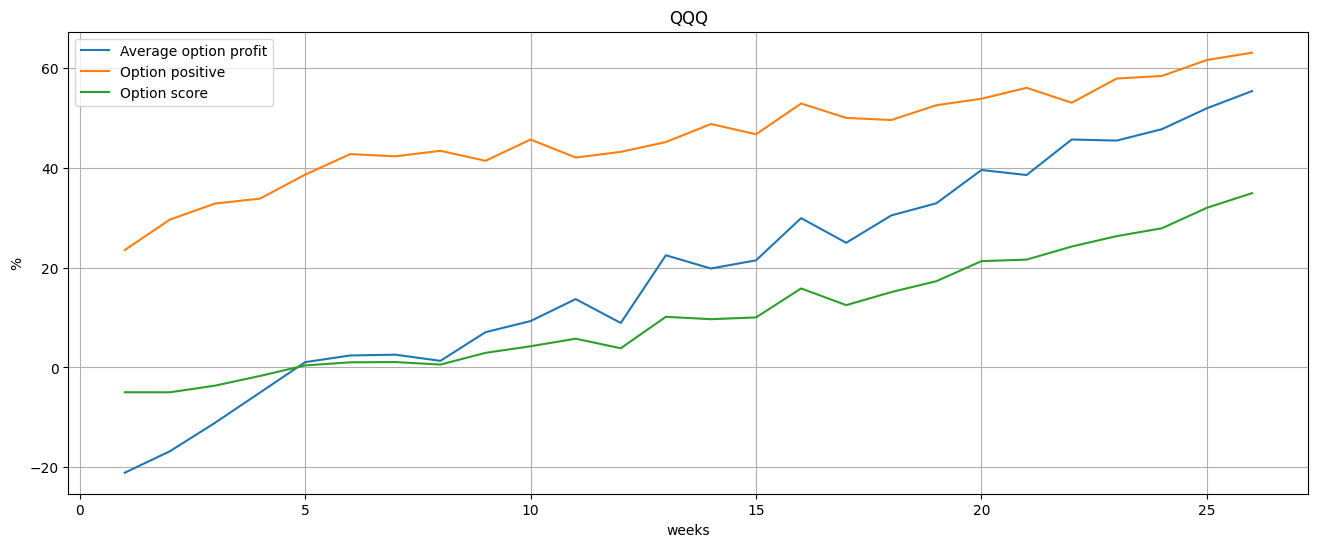

In [20]:
plt.figure(figsize=(16,6))
option_weeks = [p[0] for p in option_performance]
option_profit = [p[1] for p in option_performance]
option_positive = [p[2] for p in option_performance]
option_score = [x * y / 100 for x, y in zip(option_profit, option_positive)]
plt.plot(option_weeks, option_profit, label='Average option profit')
plt.plot(option_weeks, option_positive, label='Option positive')
plt.plot(option_weeks, option_score, label='Option score')
plt.legend(loc='upper left')
plt.title(tickerSymbol)
plt.xlabel('weeks')
plt.ylabel('%')
plt.grid()
plt.show()

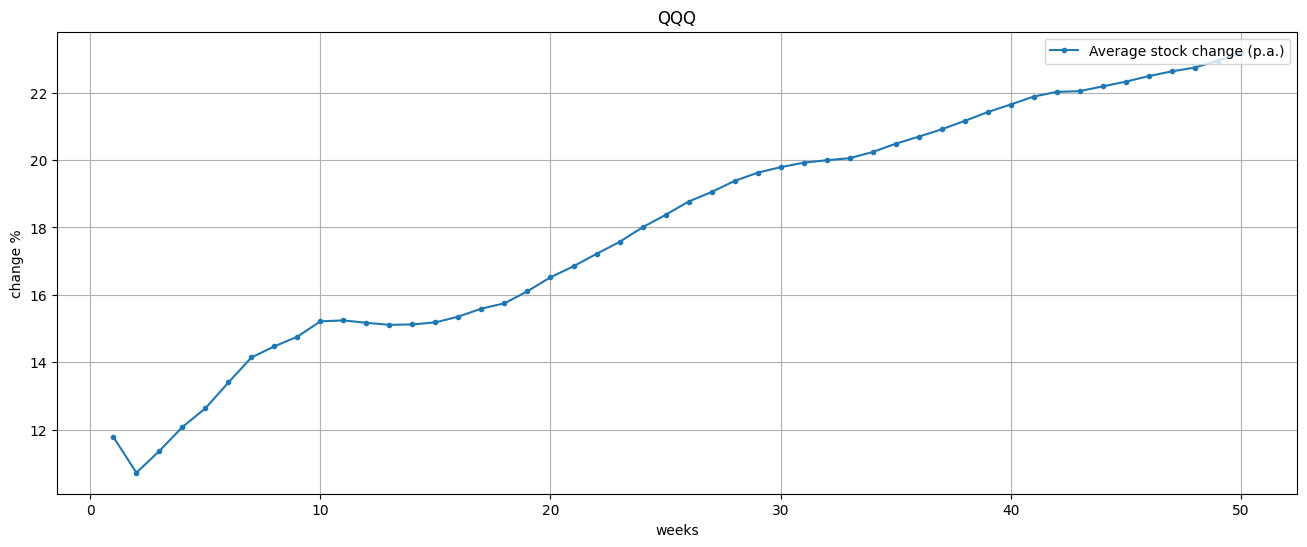

In [21]:
plt.figure(figsize=(16,6))
plt.plot(stock_change, label='Average stock change (p.a.)', marker='.')
plt.legend(loc='upper right')
plt.title(tickerSymbol)
plt.xlabel('weeks')
plt.ylabel('change %')
plt.grid()
plt.show()


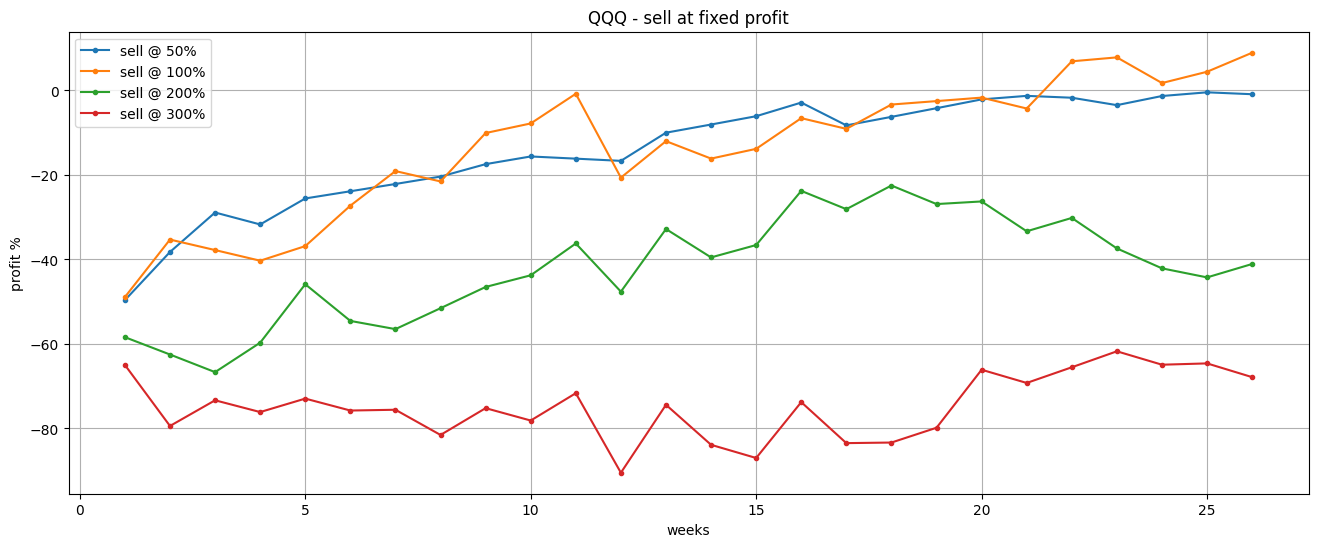

In [22]:
plt.figure(figsize=(16,6))

for percent in [50,100,200,300]:
    data = {}
    for weeks in option_leverage:
        lvr = option_leverage[weeks]
        window_max = history['High'].rolling(window=pd.api.indexers.FixedForwardWindowIndexer(window_size=weeks)).max()
        wmax = (((window_max / history['Open'] - 1) * 100 - gap) * lvr - 100).clip(lower=-100)
        wmax = wmax.dropna()
        q = (wmax >= percent).mean()
        data[weeks] = q * (percent + 100) - 100

    plt.plot(*zip(*sorted(data.items())), label=f'sell @ {percent}%', marker='.')

plt.legend(loc='best')
plt.title(f'{tickerSymbol} - sell at fixed profit')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()